# Test del efecto hipnótico de la hiosciamina

## Test de Student de una muestra

The probable error of a mean, Student, Biometrika volumen 6, issue 1, (1908), section IX, pág. 20.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

## Datos

In [2]:
scyamine_data = pd.read_csv("test_student.csv")
scyamine_data

,Dextro,Levo
0,0.7,1.9
1,-1.6,0.8
2,-0.2,1.1
3,-1.2,0.1
4,-0.1,-0.1
5,3.4,4.4
6,3.7,5.5
7,0.8,1.6
8,0.0,4.6
9,2.0,3.4


Pandas dataframe boxplot (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

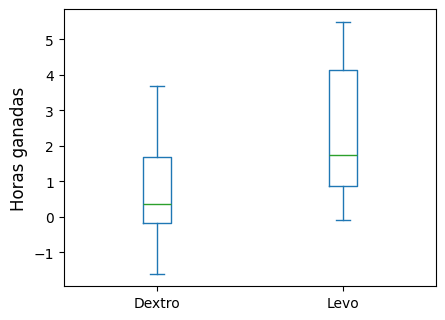

In [3]:
scyamine_data.plot(kind='box')
plt.ylabel(ylabel="Horas ganadas")
plt.show()

## Estadístico t de Student

Media muestral

In [4]:
sample_mean = scyamine_data.mean()
sample_mean

Dextro    0.75
Levo      2.33
dtype: float64

Desviación estándar muestral - *pandas aplica la corrección de Bessel por defecto!*

In [5]:
sample_dev = scyamine_data.std(ddof=1)
sample_dev

Dextro    1.789010
Levo      2.002249
dtype: float64

Desviación estándar de la media muestral

In [6]:
ndata = len(scyamine_data.index)
ndata

10

In [7]:
mean_dev = sample_dev / math.sqrt(ndata)
mean_dev

Dextro    0.565735
Levo      0.633167
dtype: float64

Número de grados de libertad

In [8]:
ndof = ndata - 1
ndof

9

Estadística t de Studen: $t = \frac{\bar{x}}{s/\sqrt{n}}$, toma $\mu = 0$ como hipótesis nula

In [9]:
t_statistic = sample_mean / mean_dev
t_statistic

Dextro    1.325710
Levo      3.679916
dtype: float64

## Pvalor

In [15]:
pvalue = scipy.stats.t.sf(t_statistic, df=ndof)
print(f"Pvalue scyamine dextro: {pvalue[0]*100:.2f}%")
print(f"Pvalue scyamine levo: {pvalue[1]*100:.2f}%")

Pvalue scyamine dextro: 10.88%
Pvalue scyamine levo: 0.25%


### **Figura**

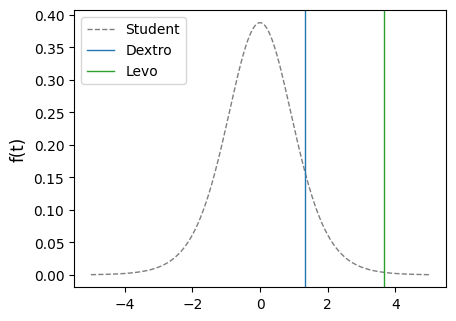

In [16]:
fig2, ax2 = plt.subplots()
ax2.set_ylabel('f(t)')
x = np.linspace(-5,5,1000)
ax2.plot(x, scipy.stats.t.pdf(x, ndof), ls='--', color='tab:grey', label='Student')
ax2.axvline(t_statistic[0], color='tab:blue', label="Dextro")
ax2.axvline(t_statistic[1], color='tab:green', label="Levo")
ax2.legend()
plt.show()

## Test de Student de una muestra con scipy

In [13]:
t_obs, pvalue = scipy.stats.ttest_1samp(a=scyamine_data[["Dextro", "Levo"]], popmean=0)
results = pd.DataFrame({"t_obs": t_obs, "pvalue": pvalue}, index=("Dextro","Levo"))
print(results)

           t_obs    pvalue
Dextro  1.325710  0.217598
Levo    3.679916  0.005076
